#### Code to find the energy eigen values of periodic tight binding model with free-free boundary conditions in 1D,2D and 3D using chebyshev approximation for k-toeplitz matrices

In [1]:
#Importing required libraries
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
import cmath
import warnings
warnings.filterwarnings("ignore")

In [2]:
def k_toeplitz_matrix(diag_k,u_k,l_k,t):
  '''function for creating the k-toeplitz matrix when diagonal,upper diagonal and lower diagonal entries are given'''
  #k - chain length
  #one chain of diagonal -diag_k
  k=np.size(diag_k)
  n=int(k*t)
  diag=[]

  for i in range(t):
    diag=np.concatenate((diag,diag_k))

  A=np.diag(diag)  #k_toeplitz matrix we want to create

# creating upper diagonal entries

  upper_diag=[]
  for i in range(t):
    upper_diag=np.concatenate((upper_diag,u_k))
  upper_diag=upper_diag[:n-1]

# creating lower diagonal entries

  lower_diag=[]
  for i in range(t):
    lower_diag=np.concatenate((lower_diag,l_k))
  lower_diag=lower_diag[:n-1]

#FILLING UPPER DIAGONAL

  for i in range(n-1):
    A[i][i+1]=upper_diag[i]

#FILLING LOWER DIAGONAL

  for i in range(n-1):
    A[i+1][i]=lower_diag[i]


  #return k-toeplitz matrix
  return(A)
  

In [3]:
def qgamma(diag_k,u_k,l_k,k):    
  '''Function to find gamma  and  Qk(z)'''

  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  #return gamma  and  Qk(z)
  return(q,gamma1)

In [16]:
def chebeig(diag_k,u_k,l_k,k,t):   
  '''function to calculate k-toeplitz eigenvalues using chebyshev approximation '''   
  n=int(k*t)
  q,g=qgamma(diag_k,u_k,l_k,k) #g represent gamma and q for Qk(z)
  #print(diag_k)
  q=np.array(q,dtype="complex")
  #print(q,g)
  tnroots=np.zeros(int(n/k),dtype=np.complex)
  for l in range(1,int(n/k)+1):
    tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))
  #print(tnroots)
  zcheb = []  #upto this fine
  c0=q[k]
  for i in range(int(n/k)):
    q[k]=c0+((cmath.sqrt(g))*tnroots[i])
    
    zcheb=np.concatenate((zcheb,-np.roots(q)))  
  
  #return approximated eigen values
  return(zcheb)

In [17]:
#instructions for the user
d=int(input("Enter the dimension of the lattice= ")) #Either 1,2 or 3
#Dimension of the lattice is same as the no of tridiagonal matrices should be created

Enter the dimension of the lattice= 3


number of chains to be repeated= 4
(12,)


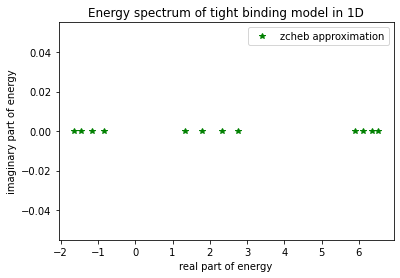

In [6]:
#Energy spectrum of 1D lattice

if(d==1):
  #k=int(input("length of the chain"))   
  t=int(input("number of chains to be repeated= "))

  hop=np.loadtxt("hopping1.txt") 
  k=len(hop)
  diag_k=np.loadtxt("onsite_energy1.txt")   #diagonal entries
  u_k=-hop        #upper diagonal
  l_k=-hop        #lower diagonal
  A=k_toeplitz_matrix(diag_k,u_k,l_k,t)

  result=sc.eig(A)
  e1=result[0]

  zcheb1=chebeig(diag_k,u_k,l_k,k,t)        #eigen values of the matrix is approximated to chebyshev polynomials
  
  plt.plot(zcheb1.real,zcheb1.imag,"*",color="green",label="zcheb approximation")
  plt.legend()
  plt.title("Energy spectrum of tight binding model in 1D with free-free boundary condition")
  plt.xlabel("real part of energy")
  plt.ylabel("imaginary part of energy")
  plt.show()

In [14]:
#Energy spectrum of 2D lattice- both square and rectangular lattice can be created
if(d==2):
  #k1=int(input("length of the x-chain"))
  t1=int(input("number of x-chains to be repeated= "))
  #k2=int(input("length of the y-chain"))
  t2=int(input("number of y-chains to be repeated="))

  hop1=np.loadtxt("hopping1.txt") #hopping chain for x direction
  hop2=np.loadtxt("hopping2.txt") #hopping chain for y direction
  k1=len(hop1)  #length of the chain in x direction
  k2=len(hop2)  #length of the chain in y direction
  #onsite energies are the diagonal  entries
  diag_k1=np.loadtxt("onsite_energy1.txt")   #onsite energy for x direction
  diag_k2=np.loadtxt("onsite_energy2.txt")   #onsite energy for y direction

  u_k1=-hop1        #upper diagonal for x chain
  l_k1=-hop1        #lower diagonal for x chain
  u_k2=-hop2        #upper diagonal for x chain
  l_k2=-hop2        #lower diagonal for x chain

  A=k_toeplitz_matrix(diag_k1,u_k1,l_k1,t1)  #tight binding hamiltonian matrix of x chain
  B=k_toeplitz_matrix(diag_k2,u_k2,l_k2,t2)  #tight binding hamiltonian matrix of y chain

  result1=sc.eig(A)
  e1=result1[0]    #Energy eigen values by python inbuilt functions for x chain

  result2=sc.eig(B)
  e2=result2[0]    #Energy eigen values by python inbuilt functions for y chain

  zcheb1=chebeig(diag_k1,u_k1,l_k1,k1,t1)      #eigen values of the matrix is approximated to chebyshev polynomials
  
  

  zcheb2=chebeig(diag_k2,u_k2,l_k2,k2,t2)       #eigen values of the matrix is approximated to chebyshev polynomials
  
 
  # 2D lattice 
  n1=int(k1*t1)  #size of the x chain
  n2=int(k2*t2)  #size of the y chain

  #Eigen values of the lattice as the kronecker sum
  z =np.kron(zcheb1,np.ones(n2))+np.kron(np.ones(n1),zcheb2)
  plt.plot(z.real,z.imag,"*")
  plt.xlabel("real part of energy eigen value")
  plt.ylabel("imaginary part of energy eigen value")
  plt.title("Energies of tight binding model in 2D lattice formed by x directional and y directional chains with free-free boundary conditio")
  plt.show()

number of x-chains to be repeated= 2
number of y-chains to be repeated= 3
number of z-chains to be repeated= 4


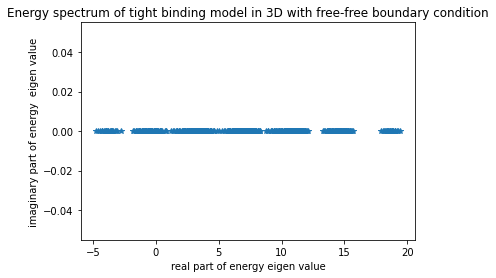

In [19]:
#3D lattice- cubic,tetragonal and orthorhombic can be created
if(d==3):
  #k1=int(input("length of the x-chain "))
  t1=int(input("number of x-chains to be repeated= "))
  #k2=int(input("length of the y-chain"))
  t2=int(input("number of y-chains to be repeated= "))
  #k3=int(input("length of the z-chain"))
  t3=int(input("number of z-chains to be repeated= "))

  hop1=np.loadtxt("hopping1.txt") #hopping chain for x direction
  hop2=np.loadtxt("hopping2.txt") #hopping chain for y direction
  hop3=np.loadtxt("hopping3.txt") #hopping chain for z direction

  k1=len(hop) #length of the chain in x direction
  k2=len(hop) #length of the chain in y direction
  k3=len(hop) #length of the chain in z direction

  #onsite energy as the diagonal term
  diag_k1=np.loadtxt("onsite_energy1.txt")   #diagonal entries of the x chain
  diag_k2=np.loadtxt("onsite_energy2.txt")   #diagonal entries of the y chain
  diag_k3=np.loadtxt("onsite_energy3.txt")   #diagonal entries of the z chain
  
  #hopping term as the upper and lower diagonal
  u_k1=-hop1        #upper diagonal for x chain
  l_k1=-hop1        #lower diagonal for x chain
  u_k2=-hop2        #upper diagonal for y chain
  l_k2=-hop2        #lower diagonal for y chain
  u_k3=-hop3        #upper diagonal for z chain
  l_k3=-hop3        #lower diagonal for z chain

  A=k_toeplitz_matrix(diag_k1,u_k1,l_k1,t1)  #tight binding hamiltonian matrix of x chain
  B=k_toeplitz_matrix(diag_k2,u_k2,l_k2,t2)  #tight binding hamiltonian matrix of y chain
  C=k_toeplitz_matrix(diag_k3,u_k3,l_k3,t3)  #tight binding hamiltonian matrix of z chain

  result1=sc.eig(A)
  e1=result1[0]  #Energy eigen values by python inbuilt functions for x chain

  result2=sc.eig(B)
  e2=result2[0]  #Energy eigen values by python inbuilt functions for y chain

  result3=sc.eig(C)
  e3=result3[0]  #Energy eigen values by python inbuilt functions for z chain

  zcheb1=chebeig(diag_k1,u_k1,l_k1,k1,t1)  #eigen values of the matrix is approximated to chebyshev polynomials
  

  zcheb2=chebeig(diag_k2,u_k2,l_k2,k2,t2)  #eigen values of the matrix is approximated to chebyshev polynomials
  
 
  zcheb3=chebeig(diag_k3,u_k3,l_k3,k3,t3)  #eigen values of the matrix is approximated to chebyshev polynomials
  

  #3D lattice
  n1=int(k1*t1)  #size of the x chain
  n2=int(k2*t2)  #size of the y chain
  n3=int(k3*t3)  #size of the z chain

  #Eigen values of the lattice as the kronecker sum
  z1=np.kron(np.kron(zcheb1,np.ones(n2)),np.ones(n3))
  z2=np.kron(np.kron(np.ones(n1),zcheb2),np.ones(n3))
  z3=np.kron(np.kron(np.ones(n1),np.ones(n2)),zcheb3)
  z=z1+z2+z3
  #print(np.shape(z2))
  plt.plot(z.real,z.imag,"*")
  plt.xlabel("real part of energy eigen value")
  plt.ylabel("imaginary part of energy  eigen value")
  plt.title("Energy spectrum of tight binding model in 3D with free-free boundary condition")
  plt.show()